# Knn Implementation on simple dataset

In [2]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import operator
from matplotlib import pyplot as plt
import os
#read in file and then give it feature headers
os.path.isfile('/Users/16786/Desktop/iris.data')
df= pd.read_csv('/Users/16786/Desktop/iris.data')
df.columns = ['sepal length', 'sepal width', ' petal length', 'petal width', 'FlowerClass']
#seperate aproximently 25% out to be in the test set with which sample goes in each set being random and marked by isTrain true or false
df['isTrain'] = np.random.uniform(0,1,len(df)) <= .75
#current dataframe formate
df.head(10)

,sepal length,sepal width,petal length,petal width,FlowerClass,isTrain
0,4.9,3.0,1.4,0.2,Iris-setosa,False
1,4.7,3.2,1.3,0.2,Iris-setosa,True
2,4.6,3.1,1.5,0.2,Iris-setosa,True
3,5.0,3.6,1.4,0.2,Iris-setosa,True
4,5.4,3.9,1.7,0.4,Iris-setosa,True
5,4.6,3.4,1.4,0.3,Iris-setosa,False
6,5.0,3.4,1.5,0.2,Iris-setosa,False
7,4.4,2.9,1.4,0.2,Iris-setosa,True
8,4.9,3.1,1.5,0.1,Iris-setosa,True
9,5.4,3.7,1.5,0.2,Iris-setosa,False


In [8]:
#change the flower types to 0 =  Iris Setosa, 1 =  Iris Versicolor, and 2 =  Iris Virginica
for x in range (0,len(df)):
    if df.iloc[x,4] == 'Iris-setosa': 
        df.iloc[x,4] = 0
    if df.iloc[x,4] == 'Iris-versicolor': 
        df.iloc[x,4] = 1
    if df.iloc[x,4] == 'Iris-virginica': 
        df.iloc[x,4] = 2
df.head(10)
#seperating train and test into two different dataframes for time effecency 
train, test = df[df['isTrain']==True], df[df['isTrain']==False]
#lengths of each set this will change with every run
print('length of train set ' + str(len(train)))
print('length of test set '+ str(len(test)))
print((train[0:0+1]).iloc[0,4])
df.head(10)
(print(np.mean(df['sepal width'])))

length of train set 118
length of test set 31
0
3.051006711409397


In [ ]:
#simple euclidian distance function feed in two dataframe rows to compare and the lenght of each feature set,
#output the euclidean distance between the two rows of features
def euclidean_distance(a, b, length):
    dist = 0
    for x in range (0, length-1):
        dist += pow((a.iloc[0,x] - b.iloc[0,x]), 2)
        
    return math.sqrt(dist)

In [4]:
#finds the k nearest neigbors to a test set entry. inputs, the full training set, one row of test features, the number of neigbors being found
#output a list containing the class of the k nearest neighbors to the test entry
def get_k_nearest_neibors(training_set, test_entry, k):
    dist_set = []
    niegbors = []
    
    for x in range (0, len(train)-1):
        #find Euclidean_distance
        this_dist = euclidean_distance(train[x:x+1], test_entry, 4)
        #pair that euclidean distance with the class value of the test point it came from
        dist_set.append((this_dist, training_set[x:x+1].iloc[0,4]))
        #sort list
    dist_set.sort(key=operator.itemgetter(0))
    for n in range (0, k):
        #add k niegbors value to the output
         niegbors.append(dist_set[n][1])
    #print(niegbors)
    return niegbors

In [5]:
#calulates the accuracy by comparing a list of the predicted classes with a list of the true classes
#output a sum of the number of correctly identifyed  classes
def accuracy_calc(predicted, real):
    correct = 0
    for x in range (0, len(real)):
        if predicted[x] == real[x:x+1].iloc[0,4]:
            correct += 1
    return correct

In [6]:
list_of_accuracys = []
list_of_accuracys_train = []
#populating a list with nonsence values
for p in range (99):
    list_of_accuracys.append(-1)
    list_of_accuracys_train.append(-1)

# Finding the best value for K

In [7]:
test_set_classifications = [0]
for x in range (0, len(test)-1):
        test_set_classifications.append(-1)
#takes 99 different values of k and uses them to preform knn on the test set. accuracys are then calculated and stored in list_of_accuracys.   
for k in range (1,100):
    class_list = [0,0,0]
    count = 0
    #the for loop running Knn on each entry in the test set for a given k value
    for x in range (0, len(test)-1):
        nieg = []
        nieg = get_k_nearest_neibors(train, test[x:x+1], k)
        for n in range(0, k-1):
            for m in range (0,3):
                if nieg[n] == (m):
                    class_list[m] += 1
        test_set_classifications[x] = (class_list.index(max(class_list)))
        #print(test_set_classifications[x])
        class_list = [0,0,0]
        count += 1
    list_of_accuracys[k-1] = accuracy_calc(test_set_classifications, test)  
    list_of_accuracys[k-1] = list_of_accuracys[k-1]/len(test)

# The best value for k appears be between 12-15 with a sharp drop off at 65

[0.36585365853658536, 0.9512195121951219, 0.926829268292683, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.926829268292683, 0.9512195121951219, 0.975609756097561, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.926829268292683, 0.9024390243902439, 0.9024390243902439, 0.926829268292683, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.926829268292683, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.926829268292683, 0.926829268292683, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.9024390243902439, 0.8780487804878049, 0.8780487804878049, 0.8780

<function matplotlib.pyplot.show(*args, **kw)>

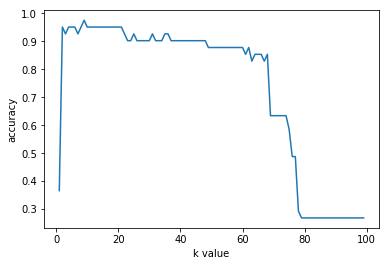

In [8]:
list_1_to_49 = []
print(list_of_accuracys)
for x in range (0,99):
    list_1_to_49.append(x+1)
    #a graph showing the results of the test set accuracy of the first 99 k values
plt.plot(list_1_to_49, list_of_accuracys)    
plt.xlabel('k value') 
# naming the y axis 
plt.ylabel('accuracy') 
plt.show

# Testing the preformance of train set on train set to test for over under fit

In [9]:
test_set_classifications_train = [0]
for x in range (0, len(train)-1):
        test_set_classifications_train.append(-1)
#this part functions the same as the test set function above except its testing the training set on its self.
for k in range (1,100):
    
    class_list = [0,0,0]
    count = 0
    for x in range (0, len(train)-1):
        nieg = []
        nieg = get_k_nearest_neibors(train, train[x:x+1], k)
        for n in range(0, k):
            for m in range (0,3):
                if nieg[n] == (m):
                    class_list[m] += 1
        test_set_classifications_train[x] = (class_list.index(max(class_list)))
        
        class_list = [0,0,0]
        count += 1
    #print(test_set_classifications_train)
    list_of_accuracys_train[k-1] = accuracy_calc(test_set_classifications_train, train)
    list_of_accuracys_train[k-1] = list_of_accuracys_train[k-1]/len(train)

[0.9907407407407407, 0.9537037037037037, 0.9537037037037037, 0.9444444444444444, 0.9537037037037037, 0.9351851851851852, 0.9537037037037037, 0.9259259259259259, 0.9351851851851852, 0.9259259259259259, 0.9351851851851852, 0.9166666666666666, 0.9259259259259259, 0.9259259259259259, 0.9351851851851852, 0.9259259259259259, 0.9351851851851852, 0.9351851851851852, 0.9259259259259259, 0.8981481481481481, 0.9166666666666666, 0.9074074074074074, 0.9074074074074074, 0.9074074074074074, 0.8981481481481481, 0.9074074074074074, 0.9166666666666666, 0.8981481481481481, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.8981481481481481, 0.9074074074074074, 0.8703703703703703, 0.8703703703703703, 0.8796296296296297, 0.8796296296296297, 0.8703703703703703, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8611111111111112, 0.8703703703703703,

<function matplotlib.pyplot.show(*args, **kw)>

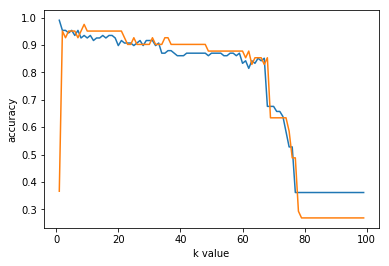

In [10]:
print(list_of_accuracys_train)
plt.plot(list_1_to_49, list_of_accuracys_train, label = 'training data')
plt.plot(list_1_to_49, list_of_accuracys, label = 'testing data')
plt.xlabel('k value') 
# naming the y axis 
# A table comparing the test and training set accuracys,it show that the is between 5 and 10 and a fairly close relation between the test and training sets
plt.ylabel('accuracy') 
plt.show

In [11]:
print(list_of_accuracys_train)

[0.9907407407407407, 0.9537037037037037, 0.9537037037037037, 0.9444444444444444, 0.9537037037037037, 0.9351851851851852, 0.9537037037037037, 0.9259259259259259, 0.9351851851851852, 0.9259259259259259, 0.9351851851851852, 0.9166666666666666, 0.9259259259259259, 0.9259259259259259, 0.9351851851851852, 0.9259259259259259, 0.9351851851851852, 0.9351851851851852, 0.9259259259259259, 0.8981481481481481, 0.9166666666666666, 0.9074074074074074, 0.9074074074074074, 0.9074074074074074, 0.8981481481481481, 0.9074074074074074, 0.9166666666666666, 0.8981481481481481, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.8981481481481481, 0.9074074074074074, 0.8703703703703703, 0.8703703703703703, 0.8796296296296297, 0.8796296296296297, 0.8703703703703703, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8703703703703703, 0.8611111111111112, 0.8703703703703703,